In [1]:
import numpy as np
import matplotlib.pyplot as plt

import stochastics.merton_jump as merton_jump
import filter.kalmanFilter as kalmanFilter
import filter.kaf as kaf


itterations = 200
# Simulated time series data (replace with your real data)
simulation = merton_jump.FX_merton([1.2,0.0001,0.0015,0.05,0.001,0.1])
series = simulation.build_series(itterations)


Backtest Metrics:
RMSE: 0.0003, MAE: 0.0003


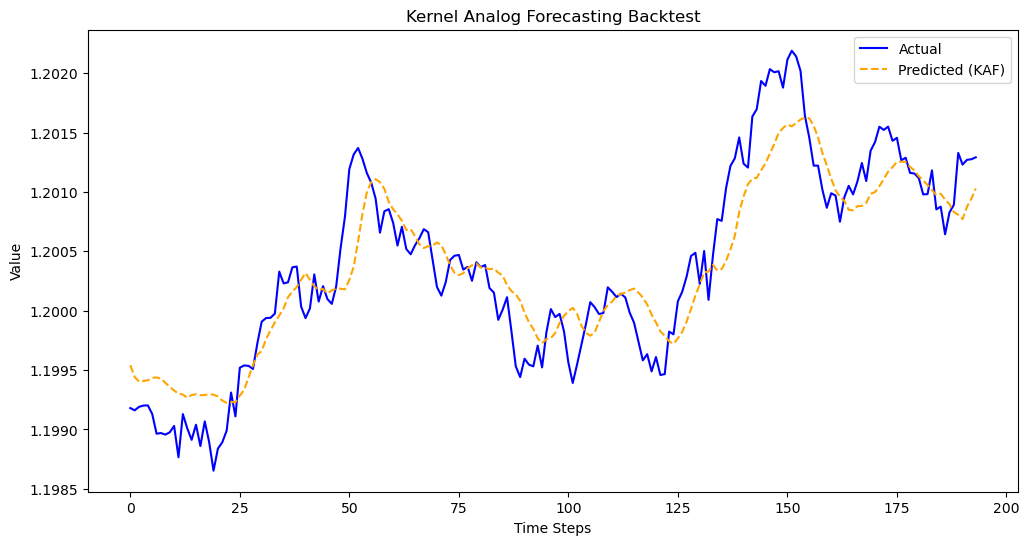

In [2]:
def compute_metrics(actual, predicted):
    """
    Compute performance metrics for the backtest.
    :param actual: Array of actual values.
    :param predicted: Array of predicted values.
    :return: Dictionary containing RMSE and MAE.
    """
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(actual - predicted))
    return {"RMSE": rmse, "MAE": mae}

# Parameters
lag = 5
forecast_steps = 1 # Predict one step ahead
bandwidth = 0.001

# Backtest
results = kaf.kaf(series, lag, forecast_steps, bandwidth)
actual = results[0]
predicted_KAF = results[1]

# Metrics
metrics = compute_metrics(actual, predicted_KAF)
print("Backtest Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}, MAE: {metrics['MAE']:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Actual", color="blue")
plt.plot(predicted_KAF, label="Predicted (KAF)", color="orange", linestyle="--")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Kernel Analog Forecasting Backtest")
plt.legend()
plt.show()


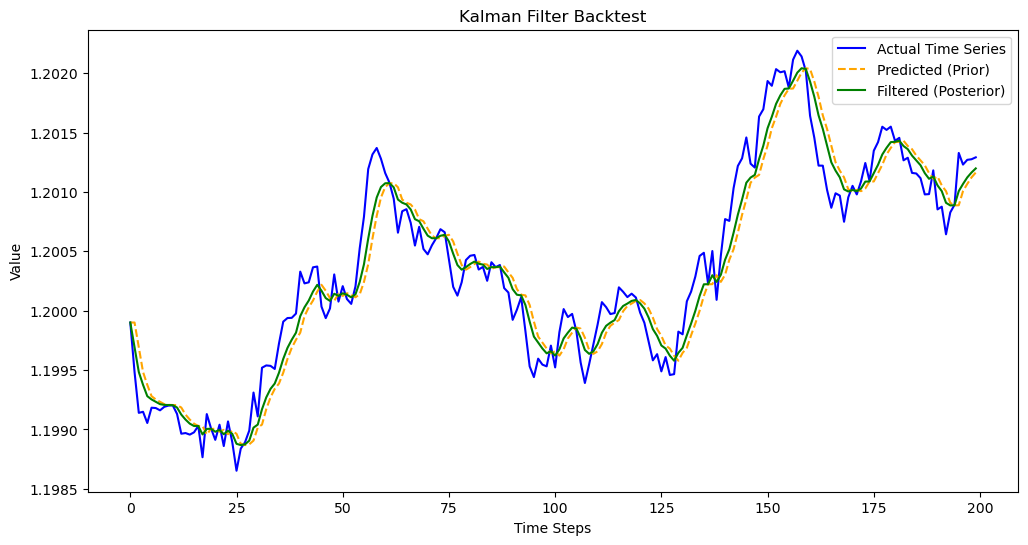

In [3]:
# Parameters
process_variance = 0.01  # Q: Process noise variance
measurement_variance = 0.1  # R: Measurement noise variance

# Backtest the Kalman Filter
results = kalmanFilter.kalman_filter(series, process_variance, measurement_variance)
actual = results["actual"]
predicted = results["predicted"]
filtered = results["filtered"]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Actual Time Series", color="blue")
plt.plot(predicted, label="Predicted (Prior)", color="orange", linestyle="--")
plt.plot(filtered, label="Filtered (Posterior)", color="green")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Kalman Filter Backtest")
plt.legend()
plt.show()
